Ahmet Akın
150200027
BLG202E Project-1

In [ ]:
import numpy as np  #Adding necessary libraries
import matplotlib.pyplot as plt
import networkx as nx

Creating a Paper class to hold necessary information regarding each paper

In [ ]:
class Paper:
    def __init__(self,paperid): #constructor for paper class
        self.paperid=paperid #holds id of the paper
        self.linksto=[]      #holds paperid's of papers cited by this paper
        self.linkedby=[]     #holds paperid's of papers cite this paper
        self.rank=0          #holds paper rank after pagerank algorithm runs
    def setRank(self,newrank):  #setter for rank
        self.rank=newrank
    def getRank(self):                   #getter for rank
        return self.rank
    def addpaper(self,target):           #adds a new paper to cited papers array
        self.linksto.append(target)
    def getID(self):                     #getter for ID
        return self.paperid
    def getCited(self):                  #getter for linksto array
        return self.linksto
    def addreference(self,reffrom):      #adds a new paper which cites this paper
        self.linkedby.append(reffrom)
    def getReference(self):              #getter for linkedby array
        return self.linkedby
    def getCitationCount(self):          #returns length of linksto array
        return len(self.linksto)
    def getRefCount(self):               #returns length of linkedby array
        return len(self.linkedby)
    def getSpecialRef(self,x):           #returns a specific index of a citing paper
        return self.linkedby[x]


function to check if a paper is in the papers array by their id. to prevent multiple definitons of same paper as different objects.

In [ ]:
def isThere(paperId):
    for i in range(len(papers)):
        if(paperId==papers[i].getID()):
            return False
    return True


Function to create a matrix of papers to be used on pageRank algorithm. To prevent negative effects of dangling node problem which means if there is no paper linked from a paper all elements in the column is changed to 1/n(number of total papers). To prevent negative effects of dead-end problem damping factor has been added to the calculation.

In [ ]:
def PaperMatrix(paperset):
    size=(len(paperset),len(paperset))
    pmatrix=np.zeros(size,dtype=float)   #initiliazing a matrix of zeros
    for j in range(0,len(paperset)):
        if(paperset[j].getCitationCount()==0):    #solution for dangling node problem
            for i in range(0,len(paperset)):
                pmatrix[i][j]=(1/len(paperset))
        else:
            for i in range(0,len(paperset)):                #assigning weight of each link=1/linked papers by the paper
                if(paperset[i].getID() in paperset[j].getCited()):
                   pmatrix[i][j]=(1/paperset[j].getCitationCount())

    e_vector=np.ones((size[0],1))
    u_vector=e_vector/size[0]
    dampingF=0.85
    pmatrix=(dampingF*pmatrix)+(1-dampingF)*(u_vector.dot(e_vector.transpose()))  #solution to dead-end problem where a visitor can jump to a random paper by a chance of 0.15
    return pmatrix


function to calculate norm of a given vector instead of using numpy functions as stated in the assignment

In [ ]:
def getNorm(vector):
    sum=0
    for i in range(len(vector)):
        sum+=vector[i]**2
    return sum**(1/2)

Function to implement pageRank algorithm to a given matrix of papers and paper array.

In [ ]:
def pageRank(papermatrix,paperset):
    vectorsize=(len(paperset),1)
    initvector=(np.ones(vectorsize,dtype=float))*(1/vectorsize[1])   #a vector is initiliazed as 1/n (number of papers) being all elements
    while(True):
        old_init=initvector
        initvector=papermatrix.dot(initvector)           #simply power method to get the dominant eigenvector
        initvector=initvector/getNorm(initvector)
        if(initvector.all()==old_init.all()):
            break

    return initvector



In [ ]:
papers=[]   #an array that holds all the papers as paper object

The main code start here to execute by firstly parsing each line from the cora.cites dataset and creating each papers object and adding the papers to their regarding locations depending on either they link to a paper or they are being linked by one.

In [ ]:
filename='./cora/cora.cites'
file1=open(filename,'r')
lines=file1.readlines()
for line in lines:
    x=line.split('\t')
    cited=x[0]             #paper that's been linked to
    citing=x[1].strip()    #paper linksto that specific paper, since it has a newline char in the end of each line we need to use strip()
    if isThere(cited):                   #if paper in the line is not created yet
        citedp=Paper(cited)              #create the paper
        citedp.addreference(citing)      #add the paperid links to the paper
        papers.append(citedp)            #add paper the paper object to the papers array
    else:
        for i in range(len(papers)):
            if(cited==papers[i].getID()):         #if paper has been created before
                papers[i].addreference(citing)    #just add the reference
                break
    if isThere(citing):                    #if paper that cites the 'cited' hasn't been created yet as an object
        citingp=Paper(citing)              #create the object
        citingp.addpaper(cited)            #add the reference paper
        papers.append(citingp)             #add citing paper to papers array
    else:
        for i in range(len(papers)):
            if(citing==papers[i].getID()):     #if it is created before
                papers[i].addpaper(cited)      #just add the referred paper to linkedby array
                break



This block is just to check if papers are added regarding to their references and if their linkedby object is updated correctly

In [ ]:
for i in range(len(papers)):
    print(papers[i].getID()," is cited by ", papers[i].getReference())

35  is cited by  ['1033', '103482', '103515', '1050679', '1103960', '1103985', '1109199', '1112911', '1113438', '1113831', '1114331', '1117476', '1119505', '1119708', '1120431', '1123756', '1125386', '1127430', '1127913', '1128204', '1128227', '1128314', '1128453', '1128945', '1128959', '1128985', '1129018', '1129027', '1129573', '1129683', '1129778', '1130847', '1130856', '1131116', '1131360', '1131557', '1131752', '1133196', '1133338', '1136814', '1137466', '1152421', '1152508', '1153065', '1153280', '1153577', '1153853', '1153943', '1154176', '1154459', '116552', '12576', '128540', '132806', '135130', '141342', '141347', '148170', '15670', '1688', '175291', '178727', '18582', '190697', '190706', '1956', '197054', '198443', '198653', '206371', '210871', '229635', '231249', '248425', '249421', '254923', '259701', '259702', '263279', '263498', '265203', '273152', '27510', '28290', '286500', '287787', '28851', '289779', '289780', '289781', '307015', '335733', '33904', '33907', '35061', 

In [ ]:
paperm=PaperMatrix(papers)   #creating the paper matrix to be used in pageRank algorithm

In [ ]:
PRvector=pageRank(paperm,papers)  #applying pageRank algorithm onto the paperm matrix

In [ ]:
for i in range(len(papers)):       #this block is also for checking if pagerank algorithm works as expected
    papers[i].setRank(PRvector[i])
    print(papers[i].getID(),"->",papers[i].getRank())

35 -> [0.55825153]
1033 -> [0.00776633]
103482 -> [0.02295562]
103515 -> [0.02485428]
1050679 -> [0.00270323]
1103960 -> [0.00270323]
1103985 -> [0.00270323]
1109199 -> [0.00270323]
1112911 -> [0.00270323]
1113438 -> [0.00270323]
1113831 -> [0.00270323]
1114331 -> [0.00270323]
1117476 -> [0.00270323]
1119505 -> [0.00270323]
1119708 -> [0.00270323]
1120431 -> [0.00270323]
1123756 -> [0.00270323]
1125386 -> [0.00270323]
1127430 -> [0.00270323]
1127913 -> [0.00270323]
1128204 -> [0.00270323]
1128227 -> [0.00270323]
1128314 -> [0.00270323]
1128453 -> [0.00270323]
1128945 -> [0.00270323]
1128959 -> [0.00270323]
1128985 -> [0.00270323]
1129018 -> [0.00270323]
1129027 -> [0.00270323]
1129573 -> [0.00270323]
1129683 -> [0.00270323]
1129778 -> [0.00270323]
1130847 -> [0.00270323]
1130856 -> [0.00270323]
1131116 -> [0.00270323]
1131360 -> [0.00270323]
1131557 -> [0.00270323]
1131752 -> [0.00270323]
1133196 -> [0.00270323]
1133338 -> [0.00270323]
1136814 -> [0.00270323]
1137466 -> [0.00270323]
11

the block below is also to check if our calculations are right, here it seems to be right because norm of the pageRank vector should be 1, this case it is not quite equal to 1 but it can be caused by roundoff errors etc.

In [ ]:
print(getNorm(PRvector)[0])

0.9999999999999822


In [ ]:
papers.sort(key=lambda x:x.getRank(),reverse=True)   #sorting papers regarding to their rank

In [ ]:
for i in range(0,20):     #printing 20 papers with the largest ranks
    print(i+1,"-",papers[i].getID(),"->",papers[i].getRank())

1 - 35 -> [0.55825153]
2 - 1365 -> [0.3044638]
3 - 3229 -> [0.20712576]
4 - 6213 -> [0.19193647]
5 - 910 -> [0.1385208]
6 - 4330 -> [0.12611621]
7 - 20193 -> [0.12193916]
8 - 24966 -> [0.11586344]
9 - 114 -> [0.11269901]
10 - 1272 -> [0.10067415]
11 - 2440 -> [0.0964971]
12 - 19621 -> [0.09168716]
13 - 887 -> [0.08396593]
14 - 8224 -> [0.08282674]
15 - 2665 -> [0.08181412]
16 - 3231 -> [0.0808015]
17 - 4584 -> [0.07814337]
18 - 15429 -> [0.07282712]
19 - 31353 -> [0.07219423]
20 - 22563 -> [0.07029557]


In [ ]:
for i in range(-20,0,1):   #printing 20 papers with lowest ranks
    print(len(papers)-i,"-",papers[i].getID(),"->",papers[i].getRank())


2728 - 1133008 -> [0.00270323]
2727 - 1134031 -> [0.00270323]
2726 - 1134056 -> [0.00270323]
2725 - 1134197 -> [0.00270323]
2724 - 1154230 -> [0.00270323]
2723 - 735311 -> [0.00270323]
2722 - 1135455 -> [0.00270323]
2721 - 1140548 -> [0.00270323]
2720 - 1135955 -> [0.00270323]
2719 - 1136631 -> [0.00270323]
2718 - 1136634 -> [0.00270323]
2717 - 1136040 -> [0.00270323]
2716 - 1136110 -> [0.00270323]
2715 - 1136447 -> [0.00270323]
2714 - 1136449 -> [0.00270323]
2713 - 1137140 -> [0.00270323]
2712 - 1138619 -> [0.00270323]
2711 - 820661 -> [0.00270323]
2710 - 1139009 -> [0.00270323]
2709 - 1140231 -> [0.00270323]


This block is to draw graph of 10 papers with the highest ranks. Red nodes show these papers and green ones are the ones that link to them. As visible on the graph, 35 has most green nodes around it since it is the paper witht the highest rank.

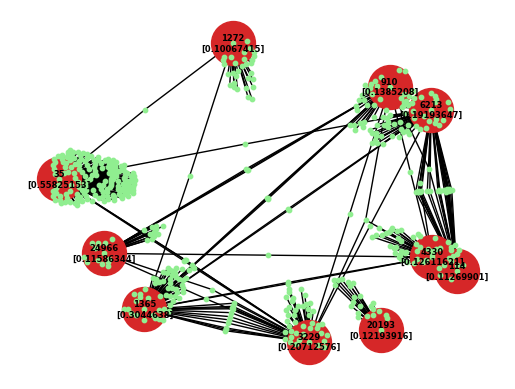

In [ ]:
graph_p=[]
labels={}
for i in range(10):
    graph_p.append(papers[i].getID())
GP=nx.DiGraph()
for i in range(0,10):
    GP.add_node(graph_p[i])
    labels[graph_p[i]]=str(graph_p[i])+"\n"+ str(papers[i].getRank())
for i in range(len(graph_p)):
    for j in range(papers[i].getRefCount()):
        ref=papers[i].getSpecialRef(j)
        GP.add_edge(ref,graph_p[i])

pos=nx.spring_layout(GP, k=2.5/np.sqrt(GP.order()))
nx.draw_networkx_nodes(GP,pos,graph_p,node_size=1000,node_color="tab:red")
nx.draw_networkx_labels(GP,pos,labels,font_weight="bold",font_color="black",font_size=6)

nx.draw(GP,pos,node_size=10,node_color="lightgreen",with_labels=False)
plt.show()